# Open a Restaurant in Vancouver

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)


<a id="introduction"></a>
### Introduction: Business Problem
Vancouver is a major city in western Canada, located in the Lower Mainland region of British Columbia. As one of the most populous city in Canada, the Greater Vancouver area had a population of 2463431 in 2016. Vancouver has the highest population density in Canada and it is one of the most ethnically and linguistically diverse cities in Canada. If a client would like to open a tradictional Chinese restaurant in Vancouver, what areas are the best option to open the restaurant? For a Chinese/Asian restaurant, the location and competition are both determined by where the restaurant is opened. If there are too many Chinese restaurants in the same area, the profitability will be relatively decreased. On the other hand, open a restaurant in a location with higher income will have relatively higher profitability of business than in a poorer location. As a data scientist, we will do a cluster of Chinese/Asian restaurant in the Greater Vancouver neighbourhood, get the average price per customer spends and reviews and rates in those restaurants. We will use Foursquare - an API that provides most updated data regarding food junctions, places to visit, and schools or colleges in the Greater Vancouver area. 


<a id="data"></a>
### Data
To answer the business problem, we will collect and use the following data:
* Population and ethnic distribution of each neighbourhood (Vancouver Census)
* Number of Chinese/Asian restaurants in each neighbourhood (Foursquare API)
* Number of restaurant in each neighbourhood (Foursqure API)
* Income distribution  of each neighbourhood (Vancouver Census)

Reference: https://opendata.vancouver.ca/explore/dataset/census-local-area-profiles-2016/information/


<a id="methodology"></a>
### Methodology


1. Combine the Vancouver dataset, containing postal code, latitude and longitude for each postal code in Vancouver, bourough, neighbourhood name, and the census dataset into a data frame.

In [1]:
import requests
import urllib.request
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import csv


url='https://en.wikipedia.org/wiki/Metro_Vancouver_Regional_District#:~:text=In%20the%202016%20Census%20of,revised%202011%20population%20of%202%2C313%2C328'
url_data=requests.get(url).text
soup = BeautifulSoup(url_data, "lxml")

In [2]:
table = soup.findAll('table',{"class":"wikitable"})[1]
values =[]
tr = table.findAll(['tr'])[1:25]
csvFile = open("vancouver.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()
    
van_df=pd.read_csv("vancouver.csv")

In [3]:
van_df_1=van_df.drop(['2011 population',van_df.columns[-1]],1)
van_df_1=van_df_1.rename(columns={"Member[13]":"Borough","Census subdivision type[14]":"Census subdivision type","2016 population[14]":"2016 population"})
van_df_1

,Borough,Census subdivision type,2016 population
0,Vancouver,City,"631,486"
1,Surrey,City,"517,887"
2,Burnaby,City,"232,755"
3,Richmond,City,"198,309"
4,Coquitlam,City,"139,284"
5,Langley,District municipality,"117,285"
6,Delta,City,"102,238"
7,North Vancouver,District municipality,"85,935"
8,Maple Ridge,City,"82,256"
9,New Westminster,City,"70,996"


Table 1. Population distribution in Greater Vancouver Area(GVA).

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_52ec20f4dd4f408685172923f910805c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tL05fOiDvsMzPABxrN2nONXcc4eMFVCM1yDDVKmnidwQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')



In [5]:

body = client_52ec20f4dd4f408685172923f910805c.get_object(Bucket='capstoneprojectweek5-donotdelete-pr-fgw1sznl9vgpsa',Key='minority population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

van_en_df= pd.read_csv(body)
van_en_df=van_en_df.rename(columns={'Minority population':'Neighbourhood'})
van_en_df.head()


,Neighbourhood,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese
0,Arbutus-Ridge,290,6970,45,105,75,35,100,190,495,220
1,Downtown,2610,9490,655,1105,1585,855,875,3620,2275,1460
2,Dunbar-Southlands,400,6525,120,165,175,55,115,85,195,235
3,Fairview,885,3865,380,645,485,140,220,425,420,585
4,Grandview-Woodland,545,3885,505,875,455,90,670,130,135,440


Table 2. Minority population from each neighbourhood within Vancouver (first five rows).

In [6]:

body = client_52ec20f4dd4f408685172923f910805c.get_object(Bucket='capstoneprojectweek5-donotdelete-pr-fgw1sznl9vgpsa',Key='BCpostal_code.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pcode = pd.read_csv(body)
#pcode.head()


In [7]:
import numpy as np
pcode=pcode[pcode['Borough']!='Not assigned']
pcode['Neighbourhood'].replace(np.nan,pcode['Borough'],inplace=True)
#pcode.head()

In [8]:
data_merge=van_df_1.merge(pcode,how='inner',left_on='Borough',right_on='Borough',suffixes=('_x','_y'))
data_m=data_merge.drop(['Census subdivision type_y'],1)
data_m=data_m.rename(columns={"Census subdivision type_x":"Census subdivision type"})
data_m=data_m.loc[data_m['Borough'] == "Vancouver"]
data_m=data_m.drop(['2016 population'],1)
data_m.head()

,Borough,Census subdivision type,Postal Code,Neighbourhood
0,Vancouver,City,V6A,Downtown
1,Vancouver,City,V6B,Downtown
2,Vancouver,City,V6C,Downtown
3,Vancouver,City,V6E,West End
4,Vancouver,City,V6G,West End


Table 3. Postal code of each neighbourhood within Vancouver (first five rows).

In [9]:
! pip install folium
import folium
print("Package imported")

Package imported


In [10]:
! pip install geocoder
import geocoder

In [11]:
import json
! pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors


In [12]:
CLIENT_ID = '3ZFIVURZWVIZG51YF3NMKYF0GTXUJZZATG3C0KCKJOWQSF5M' 
CLIENT_SECRET = 'QAGDRDD3ADXQXISOUOVYSR121OT5434XJ4CEDWPV4XYEA1VQ' 
VERSION = '20180604'
LIMIT = 200

In [13]:
postal_code=data_m['Postal Code']
geolocator = Nominatim(timeout=10,user_agent="foursquare_agent")
geocodes = [geolocator.geocode(', '.join([data_m['Postal Code'][i]]))for i in range(len(data_m))]


In [14]:
data_m['Latitude'] = [g.latitude for g in geocodes]
data_m['Longitude'] = [g.longitude for g in geocodes]
data_m

,Borough,Census subdivision type,Postal Code,Neighbourhood,Latitude,Longitude
0,Vancouver,City,V6A,Downtown,49.267224,-123.086623
1,Vancouver,City,V6B,Downtown,49.278226,-123.105780
2,Vancouver,City,V6C,Downtown,49.291810,-123.115989
3,Vancouver,City,V6E,West End,49.287537,-123.120389
4,Vancouver,City,V6G,West End,49.299723,-123.137791
5,Vancouver,City,V6H,Fairview,49.257747,-123.132920
6,Vancouver,City,V6J,Kitsilano,49.261613,-123.145796
7,Vancouver,City,V5K,Hastings-Sunrise,49.282336,-123.040000
8,Vancouver,City,V6K,Kitsilano,49.269377,-123.165066
9,Vancouver,City,V5L,Grandview,49.278839,-123.066843


Table 4. Latitude and Longitude of each postal code within Vancouver (first five rows).

2. Visualize the location of different postal codes in Vancouver to obtain the general understanding of the location. 

In [15]:
map_vancouver=folium.Map(location=[49.2627,-123.1207],zoom_start=11)
for lat,lng,borough, neighbourhood in zip(data_m['Latitude'],data_m['Longitude'],
                                         data_m['Borough'],data_m['Neighbourhood']):
    label='{},{}'.format(neighbourhood,borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=6,
                       popup=label,
                       color='blue',
                       fill=True,
                       fill_color='#3186cc',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_vancouver)
map_vancouver

Figure 1. Location of each postal code within Vancouver.

3. After the regions being visualized, the Foursquare API can be used to explore each neighbourhood and return the top 200 venues within 4000 meters of the latitude and longitude for each postal codes.

In [16]:
radius = 4000
LIMIT=200
near='Vancouver'
categoryId='4bf58dd8d48988d145941735' 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near, 
    categoryId, 
    radius, 
    LIMIT,
   
)
results = requests.get(url).json()

In [17]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

In [18]:
filtered_columns = ['venue.name','venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Peaceful Restaurant 和平饭店,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",49.263086,-123.115808
1,Congee Noodle House 粥麵館 (Congee Noodle House),"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",49.263029,-123.102105
2,Lin's Chinese Cuisine and Tea House,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",49.263776,-123.139698
3,Sun Sui Wah,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",49.250589,-123.100805
4,Long's Noodle House 小龍記麵家,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",49.241244,-123.101591


Table 5. Latitude and Longitude of Chinese/Asian restaurants within Vancouver (first five rows).

In [19]:
radius = 4000
near='Vancouver'
categories='4d4b7105d754a06374d81259'
section='Food'
url_food= 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&categoryId={}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    near, 
    categories, 
    radius, 
    LIMIT,
    section
)
results_food = requests.get(url_food).json()


In [20]:
venues_food= results_food['response']['groups'][0]['items']
nearby_food = json_normalize(venues_food)

In [21]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_f =nearby_food.loc[:, filtered_columns]
nearby_f.columns = [col.split(".")[-1] for col in nearby_f.columns]
nearby_f.head()

,name,categories,lat,lng
0,Lemonade Gluten Free Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",49.255158,-123.115276
1,Corduroy Pie Company,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",49.257053,-123.121265
2,Vij's,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",49.257525,-123.115083
3,Seasons in the Park,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",49.242021,-123.112055
4,Indian Roti Kitchen,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",49.258950,-123.115087


Table 6. Latitude and Longitude of restaurants within Vancouver (first five rows).

In [22]:
map_food=folium.Map(location=[49.2627,-123.1207],zoom_start=12)

for lat,lng in zip(nearby_f['lat'],nearby_f['lng']):
    label=[lat,lng]
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=5,
                       popup=label,
                       color='red',
                       fill=True,
                       fill_color='red',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_food)
      
for lat,lng in zip(nearby_venues['lat'],nearby_venues['lng']):
    label=[lat,lng]
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=3,
                       popup=label,
                       color='green',
                       fill=True,
                       fill_color='green',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_food)
    
map_food


Figure 2. Location of restaurants.(Green:Chinese restaurants, red: other restaurants)

4.Using the income distribution of each neighbourhood, the purchasing power of each area was calculated using median of each category weighted by the number of people in that income category, which represents the overall capital of each area. 

In [23]:

body = client_52ec20f4dd4f408685172923f910805c.get_object(Bucket='capstoneprojectweek5-donotdelete-pr-fgw1sznl9vgpsa',Key='purchasing power.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pop_df = pd.read_csv(body)


In [24]:
pp_df=pop_df.drop(columns='Median income')
pp_df.head()


,Neighbourhood,Population,Purchasing Power,Latitude,Longitude
0,Arbutus-Ridge,15295,0.643215,49.2534,-123.1604
1,Downtown,62030,1.550014,49.2820,-123.1171
2,Dunbar-Southlands,21425,0.801924,49.2500,-123.1852
3,Fairview,33620,0.858485,49.2635,-123.1313
4,Grandview-Woodland,29175,0.886697,49.2767,-123.0695


Table 7. Purchasing power of each neighbourhood within Vancouver (first five rows).

5. Use the population, purchasing power, to train KMeans clustering.

In [25]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [26]:
k=5
pp_drop_=pp_df.drop(['Neighbourhood','Population'],1)
vancouver_cluster=pp_drop_

In [27]:
kmeans=KMeans(n_clusters=k,random_state=0).fit(vancouver_cluster)
kmeans.labels_
pp_drop_.insert(0,'Cluster Label',kmeans.labels_)


In [28]:
map_vancouver_k=folium.Map(location=[49.2627,-123.1207],zoom_start=12)
x=np.arange(k)
y=[i+x+(i*x)**2 for i in range(k)]
colors_array=cm.rainbow(np.linspace(0,1,len(y)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

marker_colors=[]
for lat,lng,cluster in zip(pp_drop_['Latitude'],pp_drop_['Longitude']
                                         ,pp_drop_['Cluster Label']):
    label=folium.Popup('Cluster'+str(cluster),parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=5,
                       popup=label,
                       color=rainbow[cluster-1],
                       fill=True,
                       fill_color=rainbow[cluster-1],
                       fill_opacity=0.7).add_to(map_vancouver_k)
map_vancouver_k

Figure 2. Result of the clustering algorithm.

In [29]:

body = client_52ec20f4dd4f408685172923f910805c.get_object(Bucket='capstoneprojectweek5-donotdelete-pr-fgw1sznl9vgpsa',Key='cluster.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cluster_df = pd.read_csv(body)
cluster_df.head()


,Cluster,Purchasing Power
0,Yellow,0-0.3
1,Red,0.3-0.7
2,Green,0.7-1.1
3,Purple,1.1-1.6
4,Blue,1.6-2


Table 8. Indication of the purchasing power.

<a id="results"></a>
### Results

In [30]:
import pandas as pd
import matplotlib.pyplot as plt    
plt.style.use('ggplot')
ax = pp_df[['Neighbourhood','Purchasing Power']].plot(kind='bar', title ="Purchasing Power",figsize=(12,8),legend=True, fontsize=10)
ax.set_ylabel("Normalized purchasing power($)",fontsize=12)
ax.set_xlabel("Neighbourhood",fontsize=12)
ax.set_xticklabels(pp_df['Neighbourhood'], rotation=80)
plt.show()

<Figure size 1200x800 with 1 Axes>

Figure 3. A bar graph shows the purchasing power of each neighbourhood within Vancouver.

In [31]:
ppl_merge=van_en_df.join(pp_df.set_index('Neighbourhood'), on='Neighbourhood')
ppl_merge.head()

,Neighbourhood,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,Population,Purchasing Power,Latitude,Longitude
0,Arbutus-Ridge,290,6970,45,105,75,35,100,190,495,220,15295,0.643215,49.2534,-123.1604
1,Downtown,2610,9490,655,1105,1585,855,875,3620,2275,1460,62030,1.550014,49.2820,-123.1171
2,Dunbar-Southlands,400,6525,120,165,175,55,115,85,195,235,21425,0.801924,49.2500,-123.1852
3,Fairview,885,3865,380,645,485,140,220,425,420,585,33620,0.858485,49.2635,-123.1313
4,Grandview-Woodland,545,3885,505,875,455,90,670,130,135,440,29175,0.886697,49.2767,-123.0695


Table 9. Minority population distribution from each neighbourhood within Vancouver (first fieve rows).

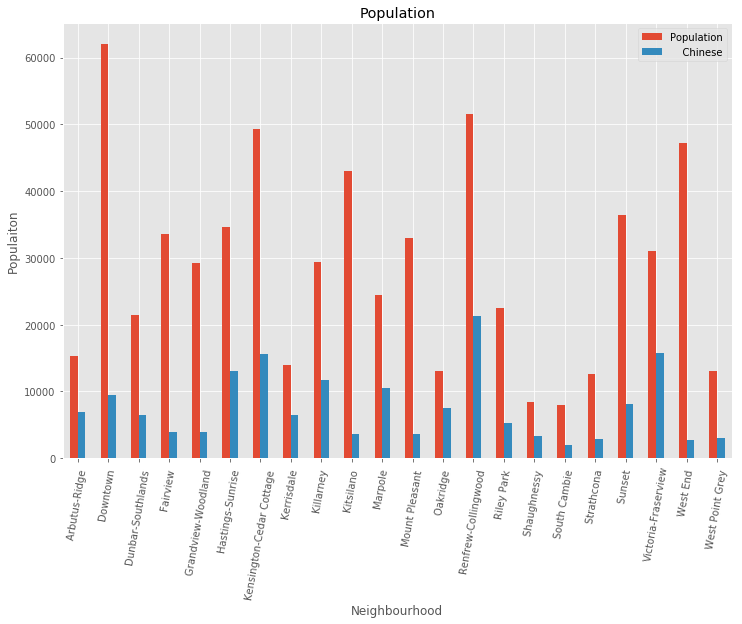

In [32]:
import pandas as pd
import matplotlib.pyplot as plt    
plt.style.use('ggplot')
ax = ppl_merge[['Population',"    Chinese"]].plot(kind='bar', title ="Population",figsize=(12,8),legend=True, fontsize=10)
ax.set_ylabel("Populaiton",fontsize=12)
ax.set_xlabel("Neighbourhood",fontsize=12)

ax.set_xticklabels(ppl_merge['Neighbourhood'], rotation=80)
plt.show()

Figure 4. A bar graph shows the populaiton and Chinese populaiton from each neighbourhood within Vancouver.

<a id="discussion"></a>
### Discussion
From the results of clustering (Figure 2), it was determined that the neighbourhoods corresponding to clusters in blue (Renfrew-Collingwood, Kensington-Cedar Cottage) were the best choices for opening an Chinese restaurant based on the normalized purchasing power. Based on the bar graph of population and Chinese population distribution(Figure 4), it was determined that Renfrew-Collingwood and Kensington-Cedar Cottage were the best choices for opening a Chinese restaurant. In the Kensington-Cedar Cottage neighbourhood, there are relative less Chinese restaurant competitors.


<a id="conclusion"></a>
### Conclusion
Opening a restaurant or starting a business is a difficult and complex task, expecially Canada is a multicultural country and Vancouver is a very diverse city. Thus, given the above analysis and results, I will recomend the client to open the Chinese restaurant in Kensington-Cedar Cottage or Renfrew-Collingwood area.